# Análisis Exploratorio (EDA)

In [1]:
!pip install statsmodels
!pip install openpyxl

#Tratamiento de datos
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from numpy.linalg import inv
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

sns.set()


You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
df_dataset_priori = pd.read_excel('/work/Data_Apriori_Normalizada_Dias.xlsx', index_col= 'Unnamed: 0')

df_dataset_priori['rangos_Cant_Recomendaciones'] = df_dataset_priori['Cant_Recomendaciones'].astype(str)
df_dataset_priori

KeyError: 'Cant_Recomendaciones'

In [3]:
df_dataset_priori.dtypes

cant_recomendaciones                                      int64
densidad_publicitaria                                   float64
dia_semana                                                int64
duracion_video_minutos                                  float64
consecutivo_tema                                          int64
densidad_recomendacion                                  float64
porcentaje_de_clics_de_las_impresiones_(%)_de_2_dias      int64
vistas_2_dias                                             int64
porc_visualizacion_2d                                   float64
likes_de_2_dias                                           int64
dislikes_de_2_dias                                        int64
marca_exito                                               int64
marca_exito2                                              int64
marca_exito3                                              int64
marca_exito4                                              int64
dtype: object

In [4]:
df_dataset_priori.columns

Index(['cant_recomendaciones', 'densidad_publicitaria', 'dia_semana',
       'duracion_video_minutos', 'consecutivo_tema', 'densidad_recomendacion',
       'porcentaje_de_clics_de_las_impresiones_(%)_de_2_dias', 'vistas_2_dias',
       'porc_visualizacion_2d', 'likes_de_2_dias', 'dislikes_de_2_dias',
       'marca_exito', 'marca_exito2', 'marca_exito3', 'marca_exito4'],
      dtype='object')

# EDA datos a Priori

In [5]:
df_dataset_priori.describe().round(3)

,cant_recomendaciones,densidad_publicitaria,dia_semana,duracion_video_minutos,consecutivo_tema,densidad_recomendacion,porcentaje_de_clics_de_las_impresiones_(%)_de_2_dias,vistas_2_dias,porc_visualizacion_2d,likes_de_2_dias,dislikes_de_2_dias,marca_exito,marca_exito2,marca_exito3,marca_exito4
count,123.000,123.000,123.000,123.000,123.000,123.000,123.000,123.000,123.000,123.000,123.000,123.000,123.000,123.000,123.000
mean,2.732,0.157,1.829,13.068,9.878,0.284,0.179,803.650,0.276,36.846,0.358,0.504,0.179,0.504,0.293
std,0.702,0.113,1.226,8.258,5.098,0.215,0.406,430.378,0.084,24.663,0.574,0.502,0.385,0.502,0.457
min,0.000,0.000,0.000,1.017,0.000,0.000,0.000,235.000,0.012,2.000,0.000,0.000,0.000,0.000,0.000
25%,3.000,0.000,1.000,6.808,5.000,0.148,0.000,484.500,0.221,16.500,0.000,0.000,0.000,0.000,0.000
50%,3.000,0.194,1.000,11.900,10.000,0.234,0.000,753.000,0.279,34.000,0.000,1.000,0.000,1.000,0.000
75%,3.000,0.230,3.000,17.433,16.000,0.359,0.000,971.500,0.317,55.500,1.000,1.000,0.000,1.000,1.000
max,3.000,0.410,6.000,47.433,17.000,1.200,2.000,2578.000,0.523,106.000,3.000,1.000,1.000,1.000,1.000


## Gráficos Tabla Contenido

In [6]:
DeepnoteChart(df_dataset_priori, """{"mark":{"clip":true,"type":"bar","color":"#4c78a8","tooltip":true},"config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{"x":{"sort":null,"type":"quantitative","field":"duracion_video_minutos","scale":{"type":"linear"}},"y":{"sort":null,"type":"quantitative","field":"vistas_2_dias","scale":{"type":"linear"},"aggregate":"sum"}}}""")

<function matplotlib.pyplot.show(close=None, block=None)>

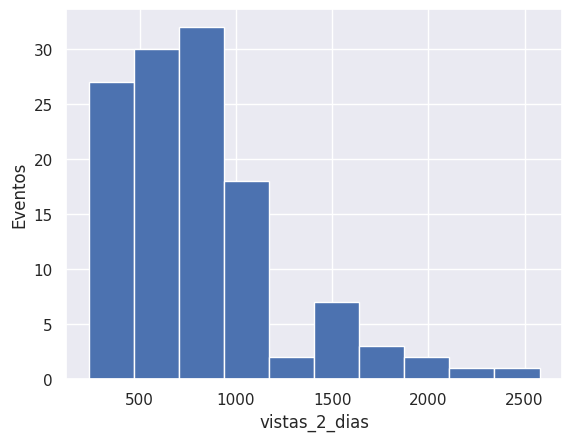

In [7]:
df_dataset_priori['vistas_2_dias']
plt.hist(df_dataset_priori['vistas_2_dias'],bins=10)
plt.xlabel('vistas_2_dias')
plt.ylabel('Eventos')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

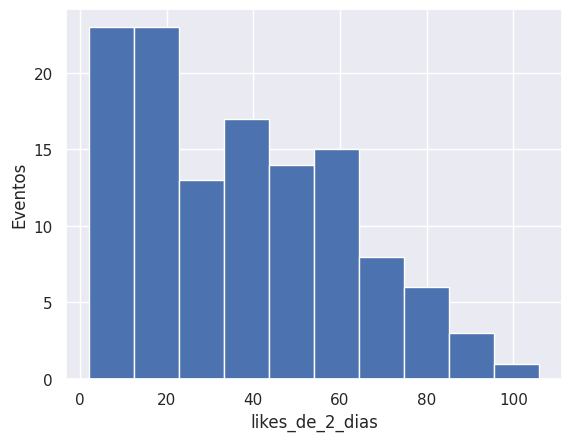

In [8]:
df_dataset_priori['likes_de_2_dias']
plt.hist(df_dataset_priori['likes_de_2_dias'],bins=10)
plt.xlabel('likes_de_2_dias')
plt.ylabel('Eventos')
plt.show

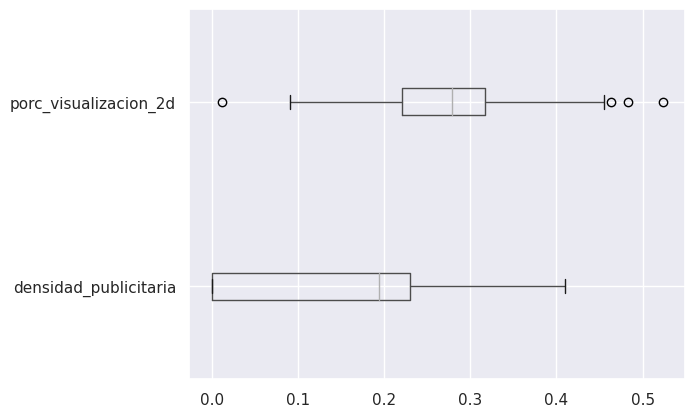

In [9]:
boxplot=df_dataset_priori.boxplot(column=['densidad_publicitaria', 'porc_visualizacion_2d'],rot=0,vert=False)
boxplot.plot
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

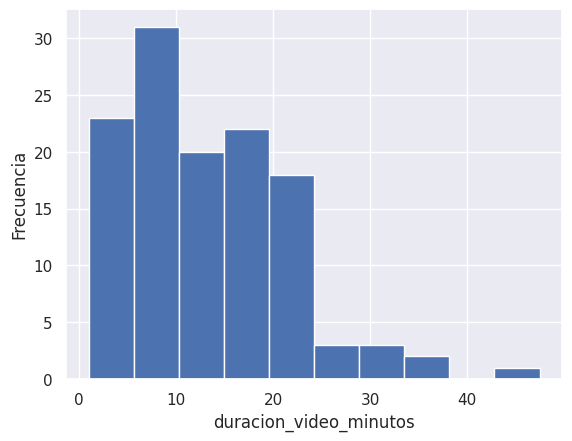

In [10]:
df_dataset_priori['duracion_video_minutos'][df_dataset_priori['duracion_video_minutos']>=200]=200
plt.hist(df_dataset_priori['duracion_video_minutos'],bins=10)
plt.xlabel('duracion_video_minutos')
plt.ylabel('Frecuencia')
plt.show

### Gráficos campos Scraping

In [11]:
DeepnoteChart(df_dataset_priori, """{"mark":{"clip":true,"type":"bar","color":"#4c78a8","tooltip":true},"config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{"x":{"sort":null,"type":"quantitative","field":"consecutivo_tema","scale":{"type":"linear"}},"y":{"sort":null,"type":"quantitative","field":"likes_de_2_dias","scale":{"type":"linear"},"aggregate":"sum"}}}""")

In [12]:
DeepnoteChart(df_dataset_priori, """{"mark":{"clip":true,"type":"bar","color":"#4c78a8","tooltip":true},"config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{"x":{"sort":null,"type":"quantitative","field":"consecutivo_tema","scale":{"type":"linear"}},"y":{"sort":null,"type":"quantitative","field":"vistas_2_dias","scale":{"type":"linear"},"aggregate":"sum"}}}""")

### Vistas

### Porcentaje Visualización General y 8 Días

In [13]:
DeepnoteChart(df_dataset_priori, """{"layer":[{"mark":{"clip":true,"type":"bar","color":"#4c78a8","tooltip":true},"encoding":{"x":{"sort":null,"type":"quantitative","field":"consecutivo_tema","scale":{"type":"linear"},"stack":"zero"},"y":{"sort":null,"type":"quantitative","field":"porc_visualizacion_2d","scale":{"type":"linear"},"stack":"zero","aggregate":"sum"},"color":{"datum":"Median of porc_visualizacion"}}},{"mark":{"clip":true,"type":"bar","color":"#f58518","tooltip":true},"encoding":{"x":{"sort":null,"type":"nominal","field":"Tema","scale":{"type":"linear"}},"y":{"sort":null,"type":"quantitative","field":"porc_visualizacion_8d","scale":{"type":"linear"},"aggregate":"median"},"color":{"datum":"Median of porc_visualizacion_8d"},"xOffset":{"datum":"Median of porc_visualizacion_8d"}}}],"config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

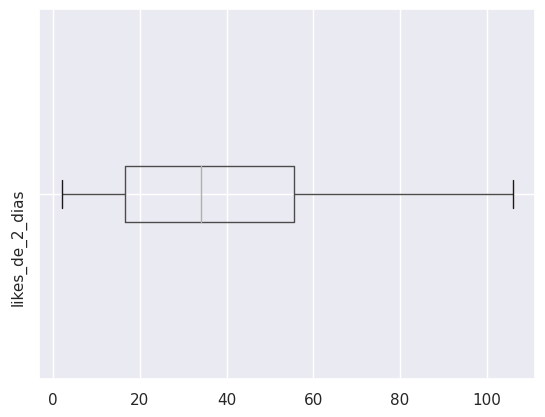

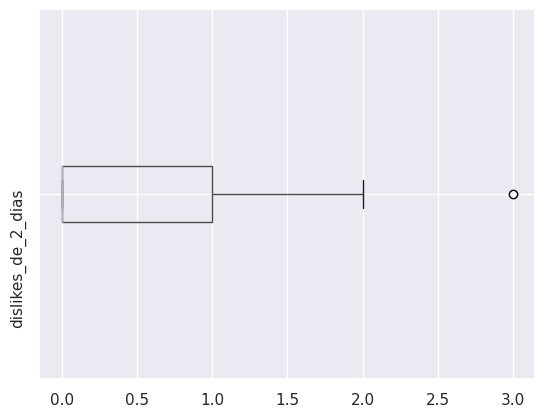

In [14]:
boxplot=df_dataset_priori.boxplot(column=['likes_de_2_dias']
,rot=90,vert=False)
boxplot.plot()
plt.show()

boxplot=df_dataset_priori.boxplot(column=['dislikes_de_2_dias']
,rot=90,vert=False)
boxplot.plot()
plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

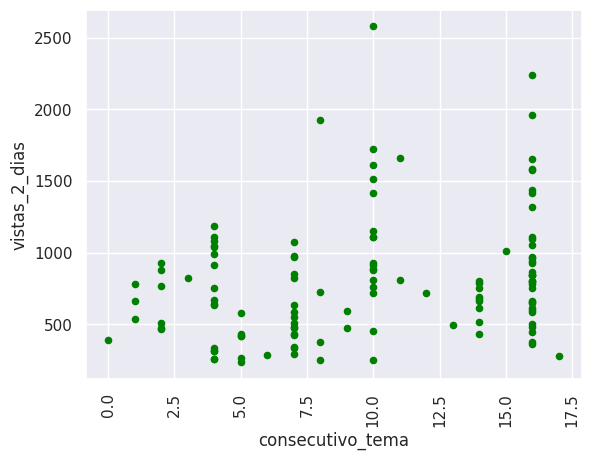

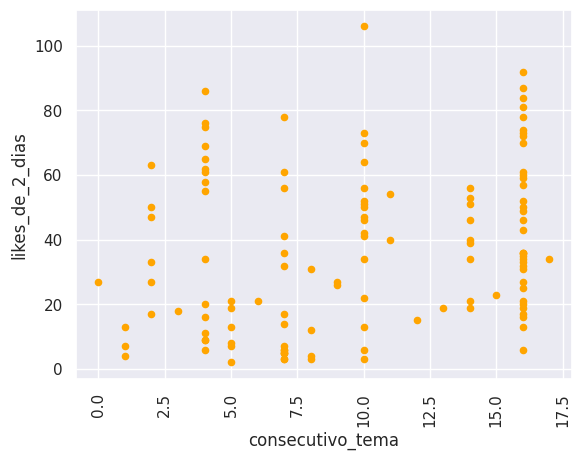

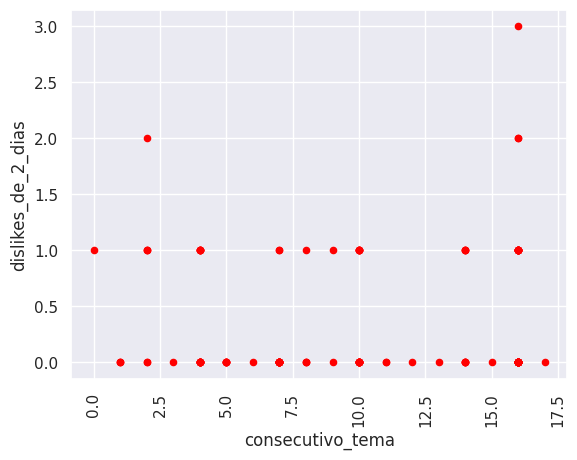

In [15]:
gd=df_dataset_priori.plot.scatter(x='consecutivo_tema',
y='vistas_2_dias'
,c='Green', rot=90)
gd.plot()
plt.show

gd=df_dataset_priori.plot.scatter(x='consecutivo_tema',
y='likes_de_2_dias'
,c='Orange', rot=90)
gd.plot()
plt.show

gd=df_dataset_priori.plot.scatter(x='consecutivo_tema',
y='dislikes_de_2_dias'
,c='Red', rot=90)
gd.plot()
plt.show

In [16]:
DeepnoteChart(df_dataset_priori, """{"mark":{"clip":true,"type":"bar","color":"#4c78a8","tooltip":true},"config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{"x":{"sort":null,"type":"quantitative","field":"marca_exito3","scale":{"type":"linear"}},"y":{"sort":null,"type":"quantitative","field":"duracion_video_minutos","scale":{"type":"linear"},"aggregate":"average"}}}""")

## Día de la semana

### Marca éxito Tipo 1: % visualización >= Mediana

In [17]:
DeepnoteChart(df_dataset_priori, """{"layer":[{"mark":{"clip":true,"type":"bar","color":"#4c78a8","tooltip":true},"encoding":{"x":{"sort":null,"type":"nominal","field":"dia_semana","scale":{"type":"linear"}},"y":{"sort":null,"type":"quantitative","field":"marca_exito","scale":{"type":"linear"},"aggregate":"sum"},"color":{"datum":"Sum of marca_exito"},"xOffset":{"datum":"Sum of marca_exito"}}},{"mark":{"clip":true,"type":"bar","color":"#f58518","tooltip":true},"encoding":{"x":{"sort":null,"type":"nominal","field":"dia_semana","scale":{"type":"linear"}},"y":{"sort":null,"type":"quantitative","field":"marca_exito3","scale":{"type":"linear"},"aggregate":"sum"},"color":{"datum":"Sum of marca_exito3"},"xOffset":{"datum":"Sum of marca_exito3"}}}],"config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

### Marca éxito Tipo 2: % clicks a impresiones >= 3%

In [18]:
DeepnoteChart(df_dataset_priori, """{"layer":[{"mark":{"clip":true,"type":"bar","color":"#4c78a8","tooltip":true},"encoding":{"x":{"sort":null,"type":"nominal","field":"dia_semana","scale":{"type":"linear"}},"y":{"sort":null,"type":"quantitative","field":"marca_exito2","scale":{"type":"linear"},"aggregate":"sum"},"color":{"datum":"Sum of marca_exito2"},"xOffset":{"datum":"Sum of marca_exito2"}}},{"mark":{"clip":true,"type":"bar","color":"#f58518","tooltip":true},"encoding":{"x":{"sort":null,"type":"nominal","field":"dia_semana","scale":{"type":"linear"}},"y":{"sort":null,"type":"quantitative","field":"marca_exito4","scale":{"type":"linear"},"aggregate":"sum"},"color":{"datum":"Sum of marca_exito4"},"xOffset":{"datum":"Sum of marca_exito4"}}}],"config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

### Porcentaje de Visualización

In [19]:
DeepnoteChart(df_dataset_priori, """{"mark":{"clip":true,"type":"bar","color":"#4c78a8","tooltip":true},"config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{"x":{"sort":null,"type":"quantitative","field":"dia_semana","scale":{"type":"linear"}},"y":{"sort":null,"type":"quantitative","field":"porc_visualizacion_2d","scale":{"type":"linear"},"aggregate":"sum"},"color":{"datum":"Sum of porc_visualizacion"}}}""")

In [20]:
!pip install pingouin==0.5.2

# Dependencia Correlación parcial
import pingouin as pg

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


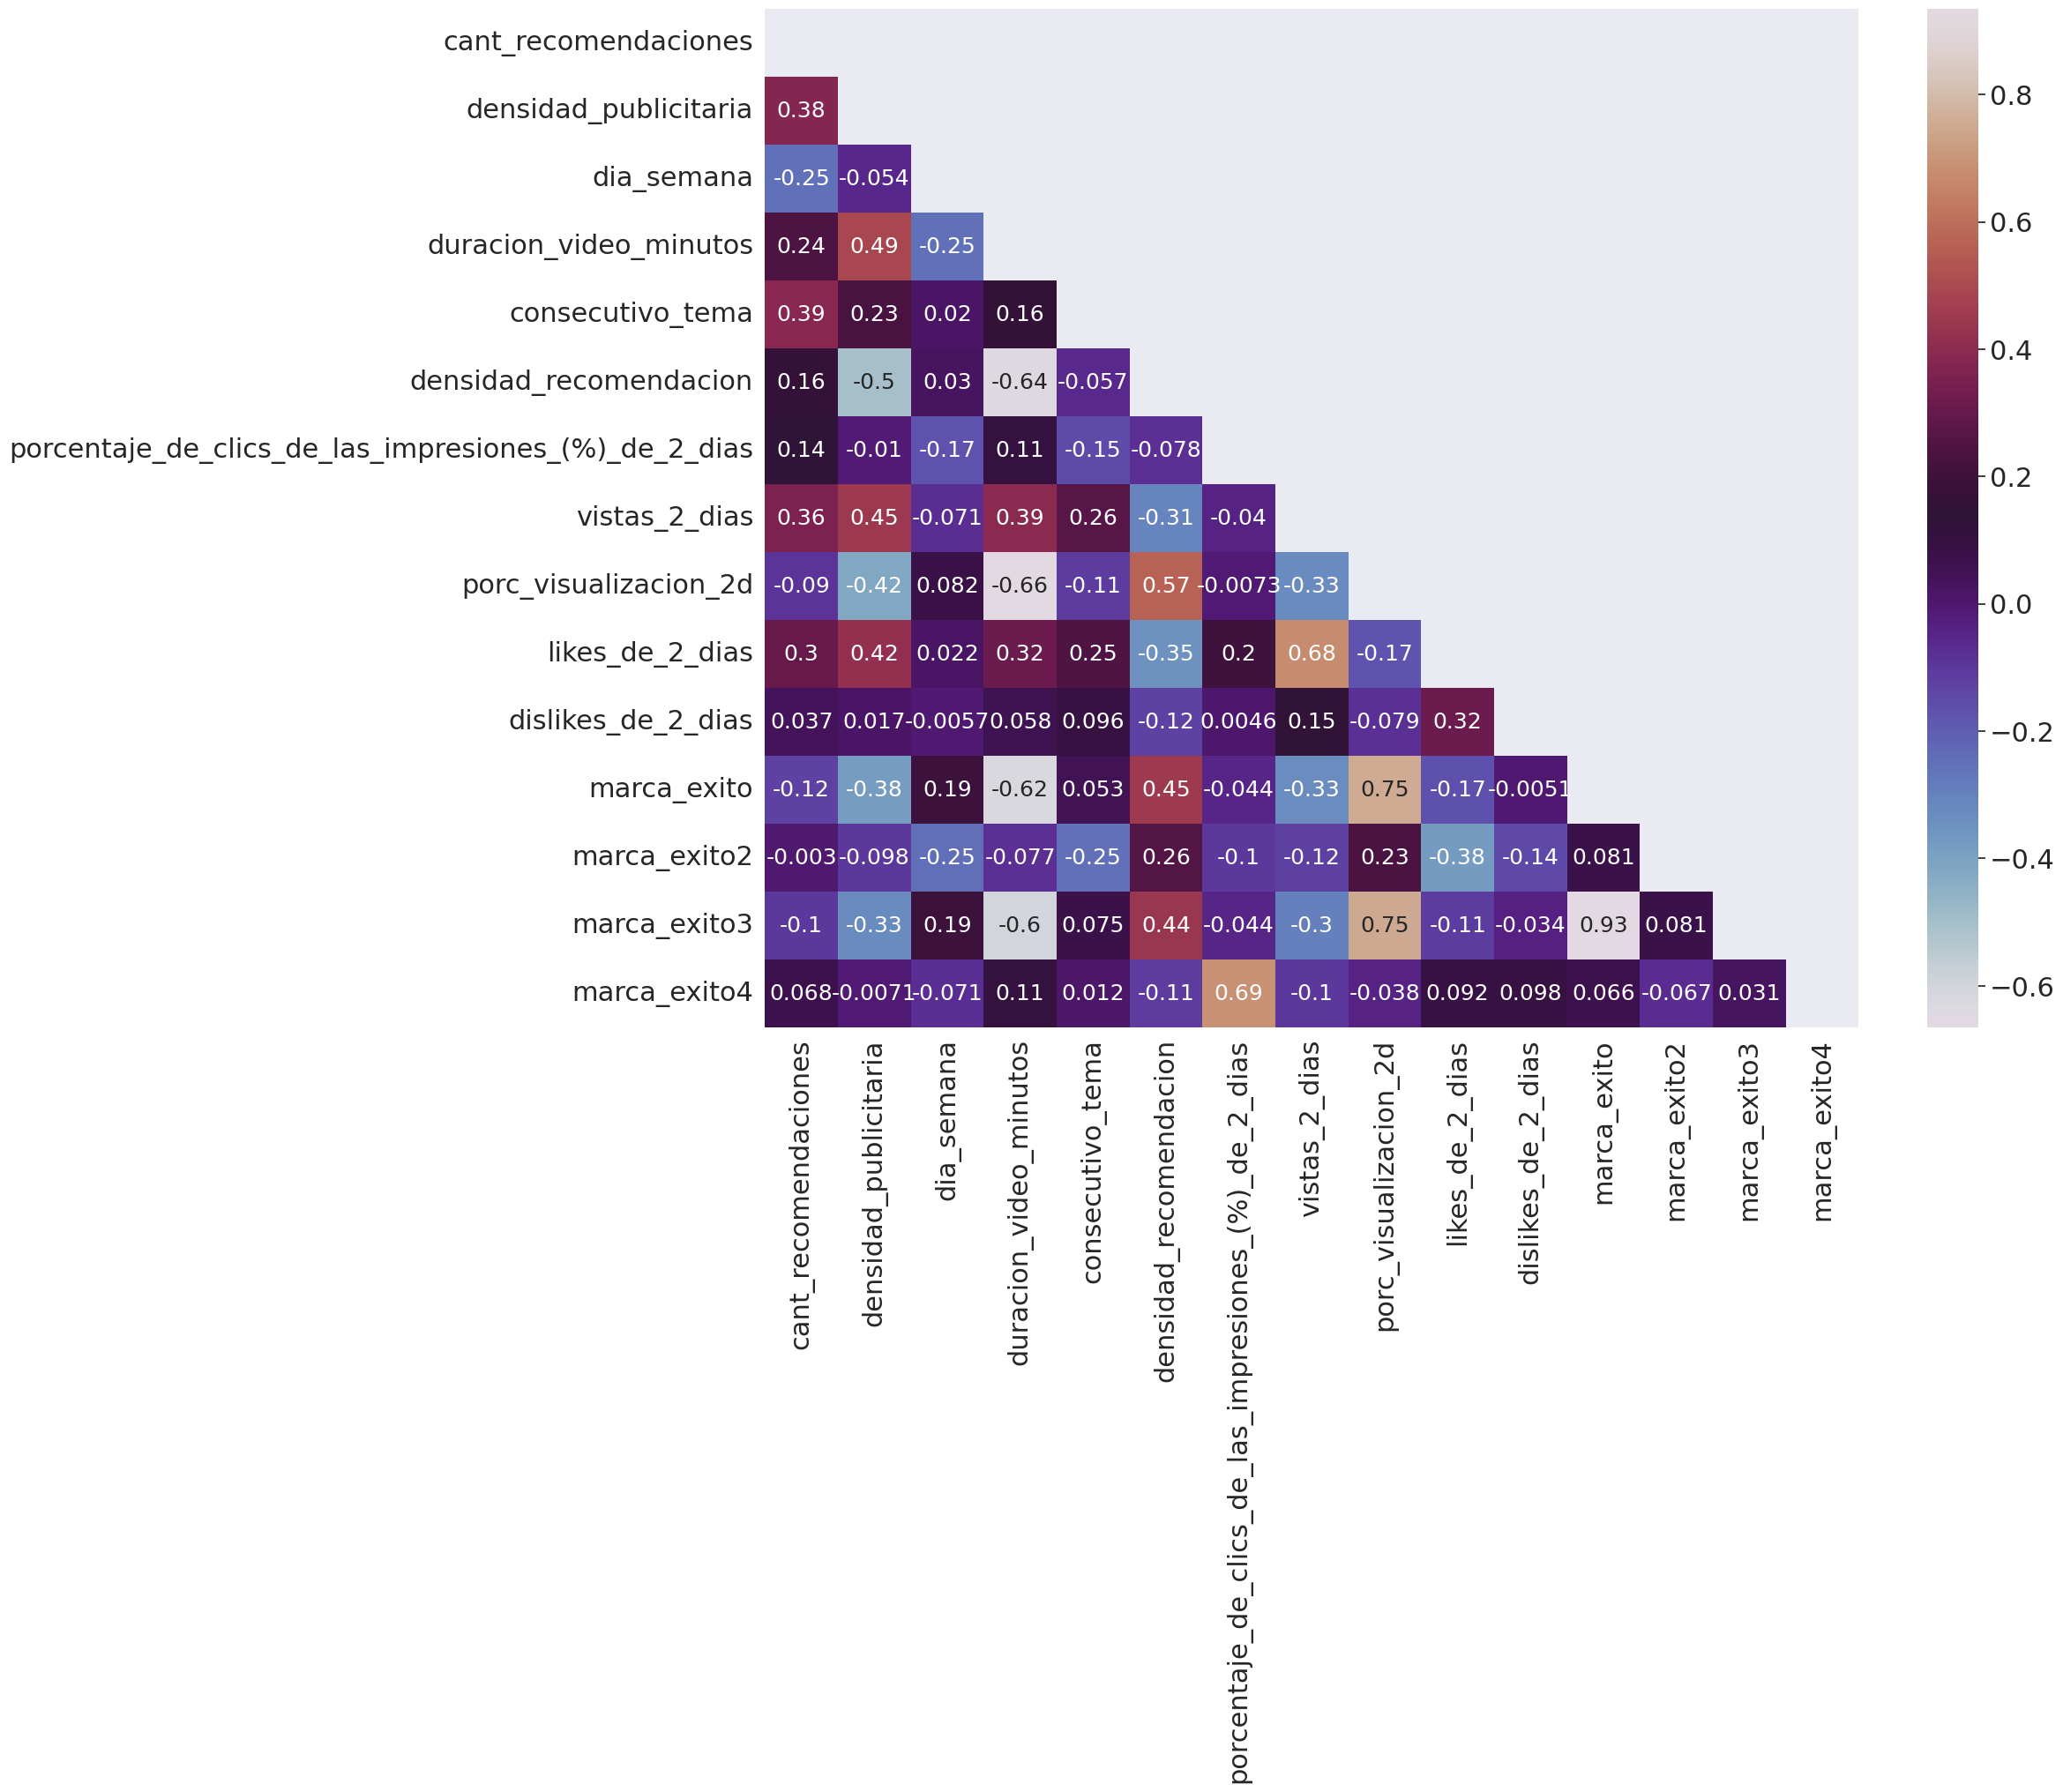

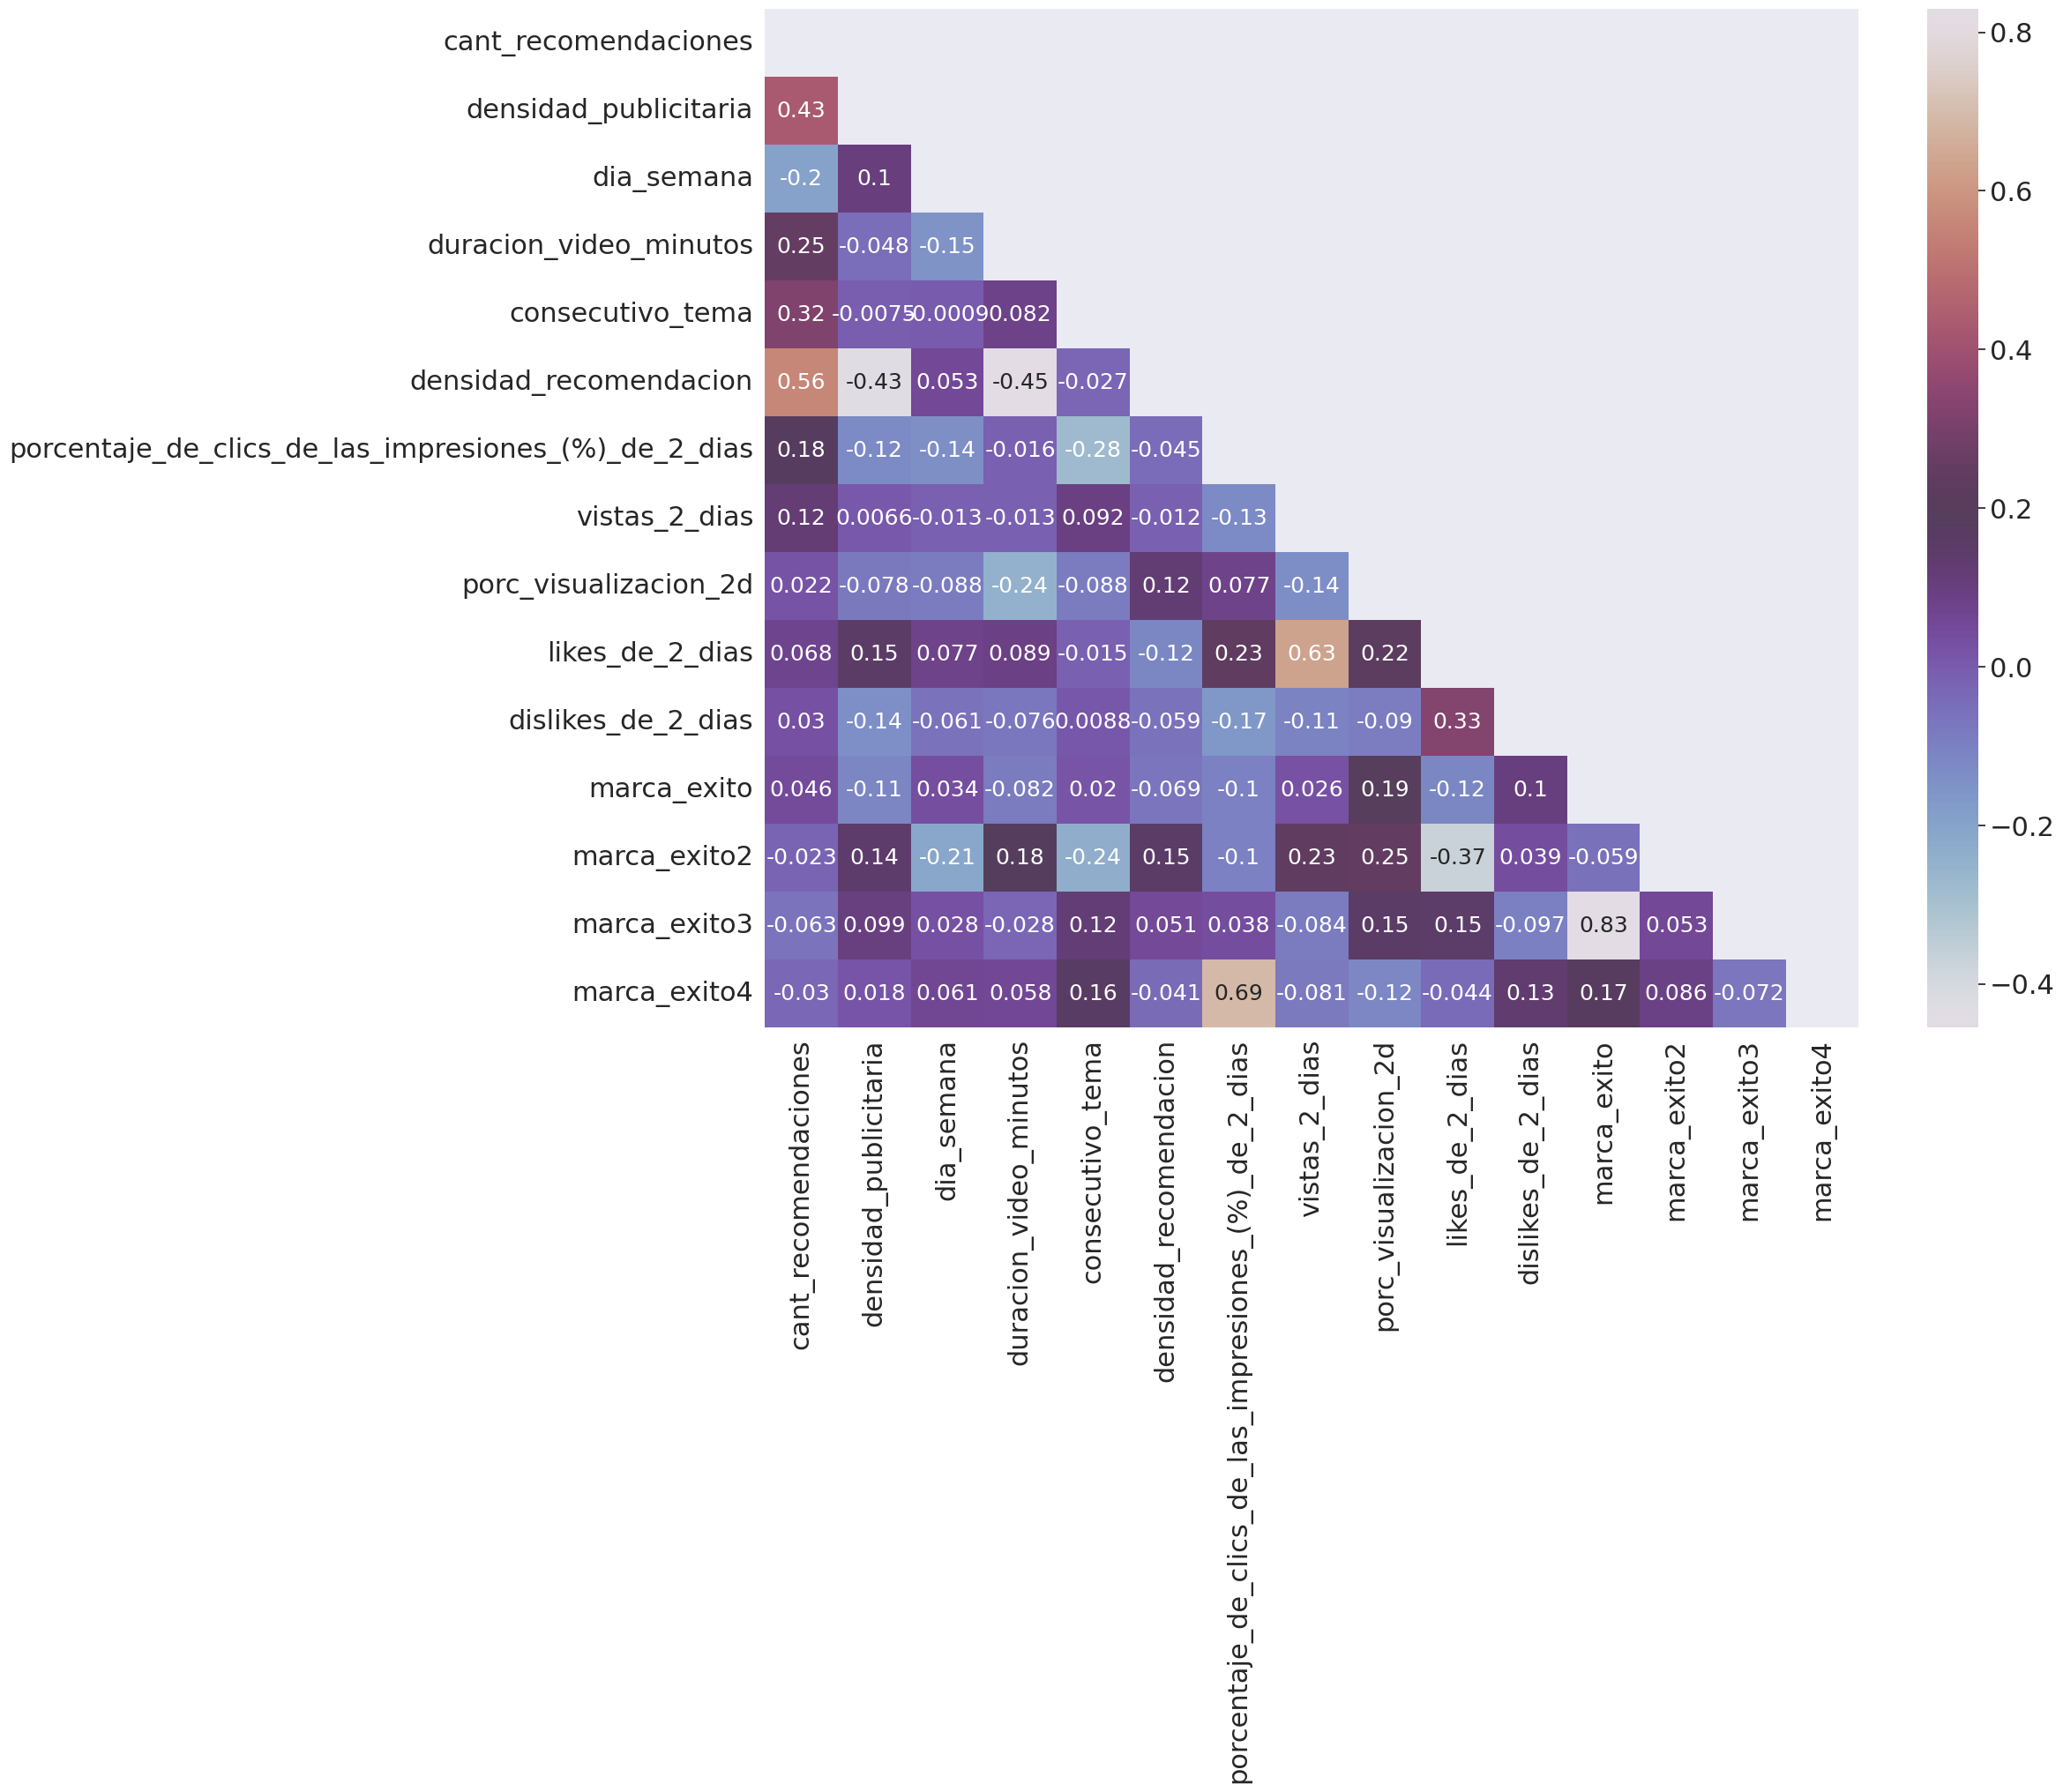

In [30]:
# CORRELACIONES SIMPLES
plt.figure(figsize = (20,15))
sns.set(font_scale=2)
corr_df = df_dataset_priori.corr(method='pearson')
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_df,annot=True,cmap='twilight',annot_kws={"size":18}, square = False, mask = mask, alpha = 1)
plt.show()

# CORRELACIONES PARCIALES
plt.figure(figsize = (20,15))

pcorr_df = df_dataset_priori.pcorr()
mask = np.zeros_like(pcorr_df)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(pcorr_df,annot=True,cmap='twilight',annot_kws={"size":18}, square = False, mask = mask, alpha = 0.8)
plt.show()

In [22]:
corr_df = df_dataset_priori.corr(method='pearson')
corr_df.round(3)

,cant_recomendaciones,densidad_publicitaria,dia_semana,duracion_video_minutos,consecutivo_tema,densidad_recomendacion,porcentaje_de_clics_de_las_impresiones_(%)_de_2_dias,vistas_2_dias,porc_visualizacion_2d,likes_de_2_dias,dislikes_de_2_dias,marca_exito,marca_exito2,marca_exito3,marca_exito4
cant_recomendaciones,1.000,0.378,-0.254,0.242,0.387,0.162,0.141,0.356,-0.090,0.304,0.037,-0.125,-0.003,-0.102,0.068
densidad_publicitaria,0.378,1.000,-0.054,0.493,0.229,-0.504,-0.010,0.446,-0.417,0.420,0.017,-0.382,-0.098,-0.327,-0.007
dia_semana,-0.254,-0.054,1.000,-0.254,0.020,0.030,-0.169,-0.071,0.082,0.022,-0.006,0.194,-0.247,0.194,-0.071
duracion_video_minutos,0.242,0.493,-0.254,1.000,0.159,-0.642,0.109,0.393,-0.665,0.315,0.058,-0.619,-0.077,-0.600,0.106
consecutivo_tema,0.387,0.229,0.020,0.159,1.000,-0.057,-0.148,0.264,-0.109,0.246,0.096,0.053,-0.248,0.075,0.012
densidad_recomendacion,0.162,-0.504,0.030,-0.642,-0.057,1.000,-0.078,-0.305,0.565,-0.349,-0.124,0.449,0.257,0.440,-0.108
porcentaje_de_clics_de_las_impresiones_(%)_de_2_dias,0.141,-0.010,-0.169,0.109,-0.148,-0.078,1.000,-0.040,-0.007,0.201,0.005,-0.044,-0.102,-0.044,0.688
vistas_2_dias,0.356,0.446,-0.071,0.393,0.264,-0.305,-0.040,1.000,-0.329,0.678,0.146,-0.332,-0.121,-0.298,-0.101
porc_visualizacion_2d,-0.090,-0.417,0.082,-0.665,-0.109,0.565,-0.007,-0.329,1.000,-0.170,-0.079,0.754,0.235,0.752,-0.038
likes_de_2_dias,0.304,0.420,0.022,0.315,0.246,-0.349,0.201,0.678,-0.170,1.000,0.316,-0.166,-0.378,-0.111,0.092


In [23]:
pcorr_df = df_dataset_priori.pcorr()
pcorr_df.round(3)

,cant_recomendaciones,densidad_publicitaria,dia_semana,duracion_video_minutos,consecutivo_tema,densidad_recomendacion,porcentaje_de_clics_de_las_impresiones_(%)_de_2_dias,vistas_2_dias,porc_visualizacion_2d,likes_de_2_dias,dislikes_de_2_dias,marca_exito,marca_exito2,marca_exito3,marca_exito4
cant_recomendaciones,1.000,0.430,-0.197,0.248,0.321,0.558,0.178,0.120,0.022,0.068,0.030,0.046,-0.023,-0.063,-0.030
densidad_publicitaria,0.430,1.000,0.104,-0.048,-0.007,-0.433,-0.125,0.007,-0.078,0.150,-0.139,-0.115,0.141,0.099,0.018
dia_semana,-0.197,0.104,1.000,-0.150,-0.001,0.053,-0.142,-0.013,-0.088,0.077,-0.061,0.034,-0.211,0.028,0.061
duracion_video_minutos,0.248,-0.048,-0.150,1.000,0.082,-0.455,-0.016,-0.013,-0.245,0.089,-0.076,-0.082,0.185,-0.028,0.058
consecutivo_tema,0.321,-0.007,-0.001,0.082,1.000,-0.027,-0.278,0.092,-0.088,-0.015,0.009,0.020,-0.236,0.118,0.160
densidad_recomendacion,0.558,-0.433,0.053,-0.455,-0.027,1.000,-0.045,-0.012,0.124,-0.117,-0.059,-0.069,0.151,0.051,-0.041
porcentaje_de_clics_de_las_impresiones_(%)_de_2_dias,0.178,-0.125,-0.142,-0.016,-0.278,-0.045,1.000,-0.126,0.077,0.234,-0.166,-0.101,-0.100,0.038,0.690
vistas_2_dias,0.120,0.007,-0.013,-0.013,0.092,-0.012,-0.126,1.000,-0.137,0.635,-0.108,0.026,0.234,-0.084,-0.081
porc_visualizacion_2d,0.022,-0.078,-0.088,-0.245,-0.088,0.124,0.077,-0.137,1.000,0.223,-0.090,0.193,0.247,0.154,-0.119
likes_de_2_dias,0.068,0.150,0.077,0.089,-0.015,-0.117,0.234,0.635,0.223,1.000,0.327,-0.116,-0.371,0.147,-0.044


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7377d29e-ada8-4781-9a6b-60a54a1f06a0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>